# Linear Regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


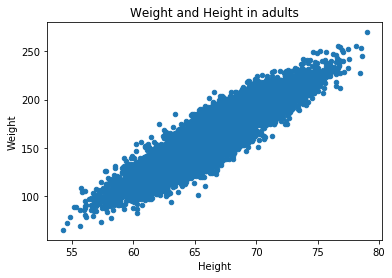

In [4]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

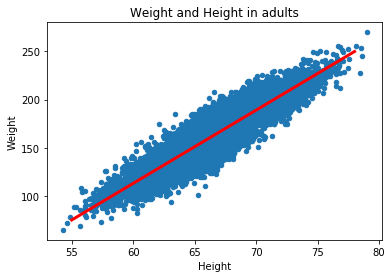

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [6]:
def line(x, w=0, b=0):
    return x * w + b

In [7]:
x = np.linspace(55, 80, 100)

In [8]:
x

array([ 55.        ,  55.25252525,  55.50505051,  55.75757576,
        56.01010101,  56.26262626,  56.51515152,  56.76767677,
        57.02020202,  57.27272727,  57.52525253,  57.77777778,
        58.03030303,  58.28282828,  58.53535354,  58.78787879,
        59.04040404,  59.29292929,  59.54545455,  59.7979798 ,
        60.05050505,  60.3030303 ,  60.55555556,  60.80808081,
        61.06060606,  61.31313131,  61.56565657,  61.81818182,
        62.07070707,  62.32323232,  62.57575758,  62.82828283,
        63.08080808,  63.33333333,  63.58585859,  63.83838384,
        64.09090909,  64.34343434,  64.5959596 ,  64.84848485,
        65.1010101 ,  65.35353535,  65.60606061,  65.85858586,
        66.11111111,  66.36363636,  66.61616162,  66.86868687,
        67.12121212,  67.37373737,  67.62626263,  67.87878788,
        68.13131313,  68.38383838,  68.63636364,  68.88888889,
        69.14141414,  69.39393939,  69.64646465,  69.8989899 ,
        70.15151515,  70.4040404 ,  70.65656566,  70.90

In [9]:
yhat = line(x, w=0, b=0)

In [10]:
yhat

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

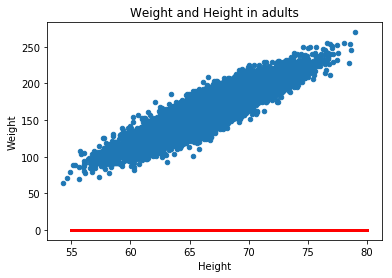

In [11]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [12]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [13]:
X = df[['Height']].values
y_true = df['Weight'].values

In [14]:
y_true

array([ 241.89356318,  162.31047252,  212.74085556, ...,  128.47531878,
        163.85246135,  113.64910268])

In [15]:
y_pred = line(X)

In [16]:
y_pred

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

In [17]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

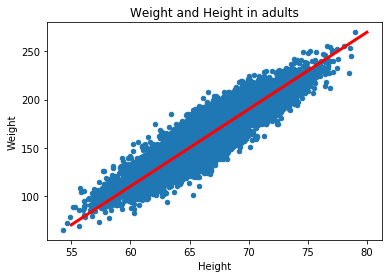

In [41]:
yhat = line(x,8,-370)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

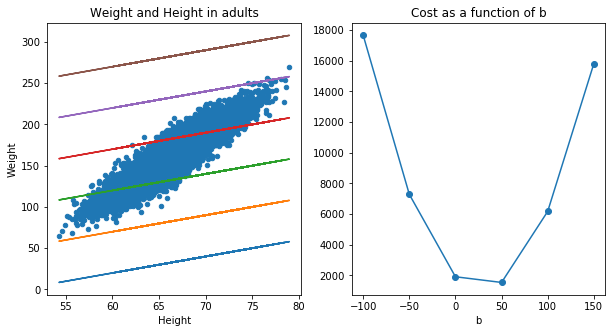

In [40]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [43]:
model = Sequential()

In [44]:
model.add(Dense(1, input_shape=(1,)))

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [47]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s - loss: 884.3140     
Epoch 2/40
10000/10000 [==============================] - 0s - loss: 549.9423     
Epoch 3/40
10000/10000 [==============================] - 0s - loss: 500.9779     
Epoch 4/40
10000/10000 [==============================] - 0s - loss: 491.3172     
Epoch 5/40
10000/10000 [==============================] - 0s - loss: 433.1734     
Epoch 6/40
10000/10000 [==============================] - 0s - loss: 391.5614     
Epoch 7/40
10000/10000 [==============================] - 0s - loss: 339.2572     
Epoch 8/40
10000/10000 [==============================] - 0s - loss: 335.9700     
Epoch 9/40
10000/10000 [==============================] - 0s - loss: 287.1281     
Epoch 10/40
10000/10000 [==============================] - 0s - loss: 262.1056     
Epoch 11/40
10000/10000 [==============================] - 0s - loss: 255.1283     
Epoch 12/40
10000/10000 [==============================] - 0s - loss: 247.6991     
E

In [48]:
y_pred = model.predict(X)

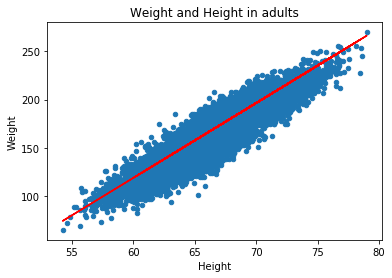

In [49]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [50]:
W, B = model.get_weights()

In [51]:
W

array([[ 7.78360891]], dtype=float32)

In [52]:
B

array([-348.37915039], dtype=float32)

## Evaluating Model Performance

In [53]:
from sklearn.metrics import r2_score

In [54]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.811


### Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [57]:
len(X_train)

8000

In [58]:
len(X_test)

2000

In [59]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [60]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [61]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [62]:
from sklearn.metrics import mean_squared_error as mse

In [63]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	183.1
The Mean Squared Error on the Test set is:	180.6


In [64]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.822
The R2 score on the Test set is:	0.828


# Classification

In [65]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [66]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


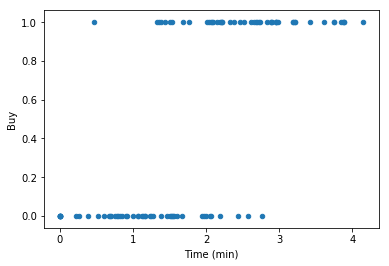

In [67]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [68]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [69]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [70]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [71]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s - loss: 0.6385 - acc: 0.6400     
Epoch 2/25
100/100 [==============================] - 0s - loss: 0.6100 - acc: 0.6000     
Epoch 3/25
100/100 [==============================] - 0s - loss: 0.5960 - acc: 0.6200     
Epoch 4/25
100/100 [==============================] - 0s - loss: 0.5556 - acc: 0.7800     
Epoch 5/25
100/100 [==============================] - 0s - loss: 0.5420 - acc: 0.8300     
Epoch 6/25
100/100 [==============================] - 0s - loss: 0.5310 - acc: 0.6900     
Epoch 7/25
100/100 [==============================] - 0s - loss: 0.5012 - acc: 0.7900     
Epoch 8/25
100/100 [==============================] - 0s - loss: 0.4778 - acc: 0.8000     
Epoch 9/25
100/100 [==============================] - 0s - loss: 0.4706 - acc: 0.8400     
Epoch 10/25
100/100 [==============================] - 0s - loss: 0.4523 - acc: 0.8200     
Epoch 11/25
100/100 [==============================] - 0s - loss: 0.4725 - acc: 0.7900   

In [ ]:
f(z) = 1 / 1 + exp(-z)

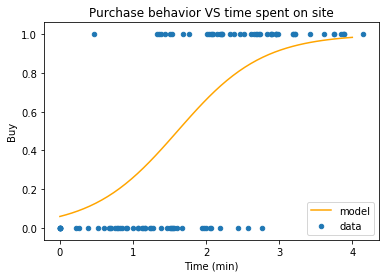

In [72]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [73]:
temp_class = model.predict(temp) > 0.5

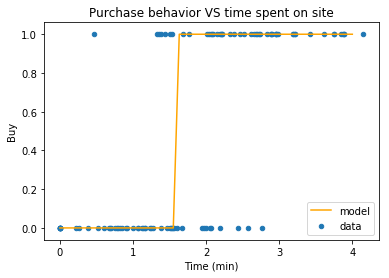

In [74]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [75]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.830


### Train/Test split


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [79]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [80]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [97]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [98]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.812
The test accuracy score is 0.850


## Cross Validation

In [83]:
from keras.wrappers.scikit_learn import KerasClassifier

In [84]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [85]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [86]:
from sklearn.model_selection import cross_val_score, KFold

In [87]:
cv = KFold(3, shuffle=True)

In [88]:
scores = cross_val_score(model, X, y, cv=cv)

In [89]:
scores

array([ 0.67647059,  0.81818182,  0.87878788])

In [90]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7911 ± 0.0848


## Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix

In [94]:
confusion_matrix(y, y_class_pred)

array([[40, 10],
       [ 7, 43]])

In [95]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [96]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,40,10
Buy,7,43


In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [100]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.811
Recall:  	0.860
F1 Score:	0.835


In [101]:
from sklearn.metrics import classification_report

In [102]:
print(classification_report(y, y_class_pred))

             precision    recall  f1-score   support

          0       0.85      0.80      0.82        50
          1       0.81      0.86      0.83        50

avg / total       0.83      0.83      0.83       100



## Feature Preprocessing

### Categorical Features

In [ ]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

In [ ]:
df['Gender'].unique()

In [ ]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

## Feature Transformations

#### 1) Rescale with fixed factor

In [ ]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [ ]:
df.describe().round(2)

#### MinMax normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

#### 3) Standard normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

In [ ]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [3]:
df = pd.read_csv('../data/housing-data.csv')
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


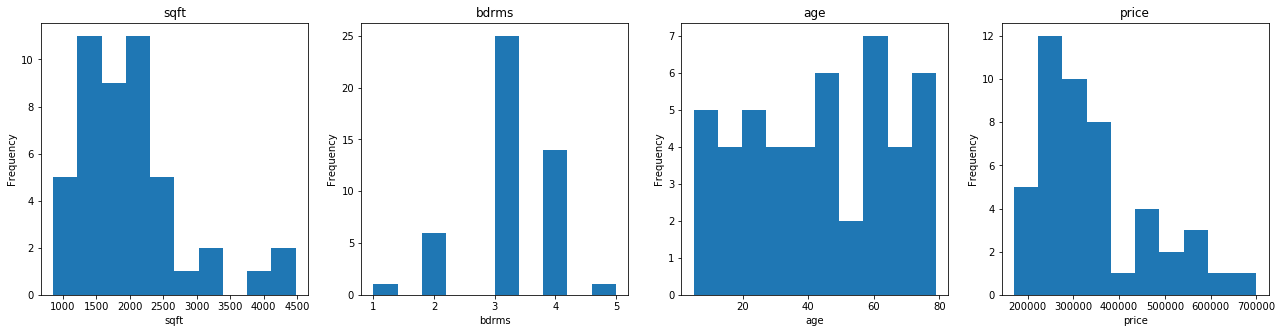

In [12]:
plt.figure(figsize=(22,5))
for i, feature in enumerate(df.columns):
    plt.subplot(1,4,i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [15]:
X = df[['sqft', 'bdrms', 'age']].values
y = df['price'].values

In [16]:
X

array([[2104,    3,   70],
       [1600,    3,   28],
       [2400,    3,   44],
       [1416,    2,   49],
       [3000,    4,   75],
       [1985,    4,   61],
       [1534,    3,   12],
       [1427,    3,   57],
       [1380,    3,   14],
       [1494,    3,   15],
       [1940,    4,    7],
       [2000,    3,   27],
       [1890,    3,   45],
       [4478,    5,   49],
       [1268,    3,   58],
       [2300,    4,   77],
       [1320,    2,   62],
       [1236,    3,   78],
       [2609,    4,    5],
       [3031,    4,   21],
       [1767,    3,   44],
       [1888,    2,   79],
       [1604,    3,   13],
       [1962,    4,   53],
       [3890,    3,   36],
       [1100,    3,   60],
       [1458,    3,   29],
       [2526,    3,   13],
       [2200,    3,   28],
       [2637,    3,   25],
       [1839,    2,   40],
       [1000,    1,    5],
       [2040,    4,   75],
       [3137,    3,   67],
       [1811,    4,   24],
       [1437,    3,   50],
       [1239,    3,   22],
 

In [17]:
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500])

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [21]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [24]:
len(X_train)

37

In [25]:
len(X_test)

10

In [26]:
model.fit(X_train, y_train)

Epoch 1/10
37/37 [==============================] - 0s - loss: 130271305506.5946     
Epoch 2/10
37/37 [==============================] - 0s - loss: 127977827134.2703     
Epoch 3/10
37/37 [==============================] - 0s - loss: 125690598593.7297     
Epoch 4/10
37/37 [==============================] - 0s - loss: 123435233390.7027     
Epoch 5/10
37/37 [==============================] - 0s - loss: 121149258668.9730     
Epoch 6/10
37/37 [==============================] - 0s - loss: 118818139827.8919     
Epoch 7/10
37/37 [==============================] - 0s - loss: 116615002388.7568     
Epoch 8/10
37/37 [==============================] - 0s - loss: 114364431055.5676     
Epoch 9/10
37/37 [==============================] - 0s - loss: 112160640913.2973     
Epoch 10/10
37/37 [==============================] - 0s - loss: 110042520714.3784     


In [27]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [28]:
from sklearn.metrics import r2_score

In [34]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('The R2 score on the Train set is:\t{:0.3f}'.format(r2_score(y_train, y_train_pred)))
print('The R2 score on the Test set is:\t{:0.3f}'.format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	-7.711
The R2 score on the Test set is:	-3.411


In [41]:
# Datos normalizados
df['sqft1000'] = df['sqft']/1000.0
df['age10'] = df['age']/10.0
df['price100k'] = df['price']/1e5

In [42]:
X = df[['sqft1000', 'bdrms', 'age10']].values
y = df['price100k'].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [44]:
model = Sequential()
model.add(Dense(1, input_dim=3))
model.compile(Adam(lr=0.1), 'mean_squared_error')
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
37/37 [==============================] - 0s - loss: 8.6029     
Epoch 2/20
37/37 [==============================] - 0s - loss: 5.2803     
Epoch 3/20
37/37 [==============================] - 0s - loss: 6.1504     
Epoch 4/20
37/37 [==============================] - 0s - loss: 5.1890     
Epoch 5/20
37/37 [==============================] - 0s - loss: 3.6120     
Epoch 6/20
37/37 [==============================] - 0s - loss: 2.7825     
Epoch 7/20
37/37 [==============================] - 0s - loss: 2.8199     
Epoch 8/20
37/37 [==============================] - 0s - loss: 2.3343     
Epoch 9/20
37/37 [==============================] - 0s - loss: 1.5053     
Epoch 10/20
37/37 [==============================] - 0s - loss: 1.2409     
Epoch 11/20
37/37 [==============================] - 0s - loss: 1.2051     
Epoch 12/20
37/37 [==============================] - 0s - loss: 1.1456     
Epoch 13/20
37/37 [==============================] - 0s - loss: 0.9491     
Epoch 14/20
37/37 [==

In [45]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.590
The R2 score on the Test set is:	0.884


In [46]:
model.fit(X_train, y_train, epochs=40, verbose=0)

In [47]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.712
The R2 score on the Test set is:	0.773


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [48]:
df = pd.read_csv('../data/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [50]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [51]:
df.left.value_counts()/len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

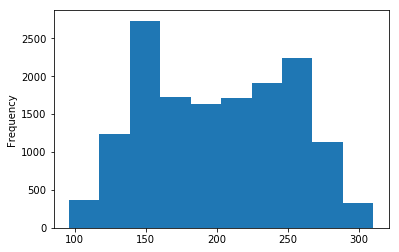

In [52]:
df['average_montly_hours'].plot(kind='hist')

In [53]:
df['average_montly_hours_100'] = df['average_montly_hours']/100

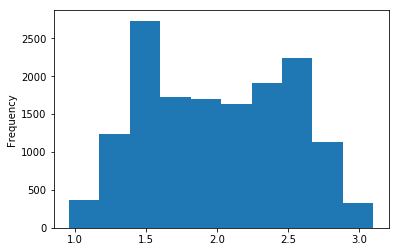

In [54]:
df['average_montly_hours_100'].plot(kind='hist')

In [55]:
df_dummies = pd.get_dummies(df[['sales', 'salary']])

In [56]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [57]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'average_montly_hours_100'],
      dtype='object')

In [71]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
                   'time_spend_company', 'Work_accident',
                   'promotion_last_5years', 'average_montly_hours_100']],
              df_dummies], axis=1).values
y = df['left'].values

In [72]:
X.shape

(14999, 20)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [74]:
model = Sequential()
model.add(Dense(1, input_dim=20,activation='sigmoid'))
model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit(X_train, y_train)

Epoch 1/10
11999/11999 [==============================] - 0s - loss: 0.5537 - acc: 0.7584     
Epoch 2/10
11999/11999 [==============================] - 0s - loss: 0.5538 - acc: 0.7650     
Epoch 3/10
11999/11999 [==============================] - 0s - loss: 0.5397 - acc: 0.7630     
Epoch 4/10
11999/11999 [==============================] - 0s - loss: 0.5609 - acc: 0.7622     
Epoch 5/10
11999/11999 [==============================] - 0s - loss: 0.5594 - acc: 0.7635     
Epoch 6/10
11999/11999 [==============================] - 0s - loss: 0.5295 - acc: 0.7648     
Epoch 7/10
11999/11999 [==============================] - 0s - loss: 0.5511 - acc: 0.7594     
Epoch 8/10
11999/11999 [==============================] - 0s - loss: 0.5372 - acc: 0.7656     
Epoch 9/10
11999/11999 [==============================] - 0s - loss: 0.5625 - acc: 0.7576     
Epoch 10/10
11999/11999 [==============================] - 0s - loss: 0.5418 - acc: 0.7636     


In [77]:
y_test_pred = model.predict_classes(X_test)

  32/3000 [..............................] - ETA: 2s

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [83]:
pretty_confusion_matrix(y_test,y_test_pred, labels=['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,1776,498
Leave,229,497


In [84]:
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.89      0.78      0.83      2274
          1       0.50      0.68      0.58       726

avg / total       0.79      0.76      0.77      3000



In [85]:
from keras.wrappers.scikit_learn import KerasClassifier

In [86]:
def build_logistic_regresion_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regresion_model,
                        epochs=10, verbose=0)

In [87]:
from sklearn.model_selection import KFold, cross_val_score

In [88]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print('The cross validation accuracy is {:0.4f} ± {:0.4f}'.format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7718 ± 0.0127


In [89]:
scores

array([ 0.76866667,  0.75233333,  0.76633333,  0.78533333,  0.78626209])